In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer



In [2]:
# Load dataset

cancer = load_breast_cancer()
x = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target # Malignant = 0, 


In [3]:
# Spliting data into training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the feature
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [5]:
# Defining the parameter grid for hyperparameter turning

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga']
}


In [6]:
# Creating the Logistic Regression

log = LogisticRegression(max_iter=1000)
# log.fit(x_train, y_test)

In [7]:
# Performing GridSearch with Crass Validation
grid_search = GridSearchCV(log, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(x_train, y_train)



/home/ked/Documents/machine_language_models/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ked/Documents/machine_language_models/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ked/Documents/machine_language_models/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ked/Documents/machine_language_models/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ked/Documents/machine_language_models/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_ite

,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.001, 0.01, ...], 'solver': ['liblinear', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [8]:
best_params = grid_search.best_params_
print(f"Best Parameter: {best_params}")

Best Parameter: {'C': 0.1, 'solver': 'liblinear'}


In [9]:
best_model = LogisticRegression(**best_params, max_iter=1000)
best_model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
y_pred = best_model.predict(x_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [12]:
print("-"*50)
print(f"Accuracy: {accuracy:.4f} \nConfusion: \n{conf_matrix} \nClassification: \n{class_report}")
print("-"*50)

--------------------------------------------------
Accuracy: 0.9825 
Confusion: 
[[41  2]
 [ 0 71]] 
Classification: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

--------------------------------------------------


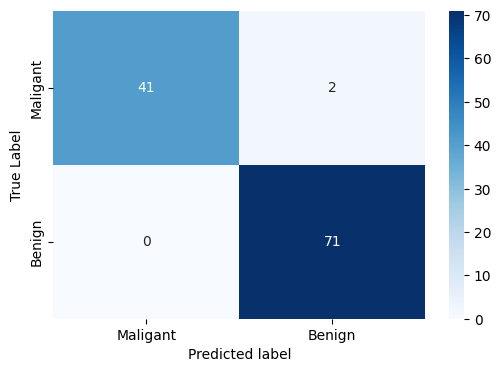

In [13]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Maligant', 'Benign'], yticklabels=['Maligant', 'Benign'])
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()